<a href="https://colab.research.google.com/github/Litzu10/python1/blob/master/HW_RNN_0425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 調整部分：
1. data num_words
2. maxlen
3. Embedding 維度
4. LSTM 層數
5. dropout rate、recurrent_dropout rate
6. 新增model 2
7. 畫出兩模型準確率比較圖





# 1.讀入深度學習套件

In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# 2. 讀入數據

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=12000)

# 3. 資料處理

In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

#4. step01:打造函數學習機

In [0]:
model = Sequential()

In [0]:
model.add(Embedding(12000,128)) #壓縮到128維

In [0]:
model.add(LSTM(100, dropout=0.15, recurrent_dropout=0.15))

In [0]:
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1536000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,627,701
Trainable params: 1,627,701
Non-trainable params: 0
_________________________________________________________________


計算需要調整的參數 : 

In [30]:
(128+100+1)*4*100

91600

# 5.step02:訓練

In [31]:
result = model.fit(x_train, y_train, batch_size=50, epochs=8,
          validation_data=(x_test,y_test))

Epoch 1/8
500/500 [==============================] - 203s 406ms/step - loss: 0.3919 - accuracy: 0.8241 - val_loss: 0.5160 - val_accuracy: 0.8146
Epoch 2/8
500/500 [==============================] - 204s 408ms/step - loss: 0.2370 - accuracy: 0.9092 - val_loss: 0.3405 - val_accuracy: 0.8580
Epoch 3/8
500/500 [==============================] - 202s 404ms/step - loss: 0.1744 - accuracy: 0.9354 - val_loss: 0.3785 - val_accuracy: 0.8564
Epoch 4/8
500/500 [==============================] - 205s 410ms/step - loss: 0.1291 - accuracy: 0.9527 - val_loss: 0.4102 - val_accuracy: 0.8520
Epoch 5/8
500/500 [==============================] - 199s 397ms/step - loss: 0.0966 - accuracy: 0.9662 - val_loss: 0.5170 - val_accuracy: 0.8478
Epoch 6/8
500/500 [==============================] - 197s 394ms/step - loss: 0.0843 - accuracy: 0.9708 - val_loss: 0.5482 - val_accuracy: 0.8474
Epoch 7/8
500/500 [==============================] - 202s 404ms/step - loss: 0.0629 - accuracy: 0.9794 - val_loss: 0.6794 - val_ac

#### Model 2


調整dropout rate 看是否對預測準確率造成影響

In [0]:
model2 = Sequential()

In [0]:
model2.add(Embedding(12000,128))

In [0]:
model2.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

In [0]:
model2.add(Dense(1, activation='sigmoid'))

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1536000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,627,701
Trainable params: 1,627,701
Non-trainable params: 0
_________________________________________________________________


In [39]:
result2 = model2.fit(x_train, y_train, batch_size=50, epochs=8,
                     validation_data=(x_test,y_test))

Epoch 1/8
500/500 [==============================] - 203s 406ms/step - loss: 0.4230 - accuracy: 0.7982 - val_loss: 0.3266 - val_accuracy: 0.8625
Epoch 2/8
500/500 [==============================] - 208s 415ms/step - loss: 0.2514 - accuracy: 0.9006 - val_loss: 0.3351 - val_accuracy: 0.8632
Epoch 3/8
500/500 [==============================] - 207s 414ms/step - loss: 0.1817 - accuracy: 0.9322 - val_loss: 0.3396 - val_accuracy: 0.8622
Epoch 4/8
500/500 [==============================] - 210s 420ms/step - loss: 0.1372 - accuracy: 0.9498 - val_loss: 0.5104 - val_accuracy: 0.8499
Epoch 5/8
500/500 [==============================] - 208s 417ms/step - loss: 0.1012 - accuracy: 0.9640 - val_loss: 0.4896 - val_accuracy: 0.8569
Epoch 6/8
500/500 [==============================] - 208s 416ms/step - loss: 0.0832 - accuracy: 0.9706 - val_loss: 0.5168 - val_accuracy: 0.8504
Epoch 7/8
500/500 [==============================] - 205s 409ms/step - loss: 0.0722 - accuracy: 0.9751 - val_loss: 0.6318 - val_ac

#### 比較兩模型預測準確率

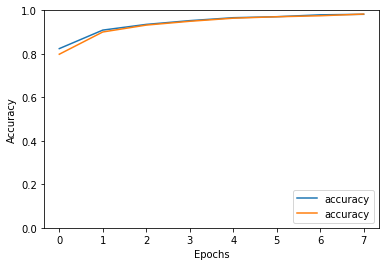

In [40]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result2.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

model和model2的差別在於dropout rate的不同

一開始model2的準確率比model低一點點，但訓練多次後準確率幾乎相同且相當高。